In [ ]:
import numpy as np
import pandas as pd
#statsmodel
import statsmodels.api as sm
#oridinary least squares
from statsmodels.formula.api import ols
#plotting
import matplotlib.pyplot as plt

In [ ]:
#read the csv
X = pd.read_csv("insured.csv")
X.head()

,Group,Insurance
0,Company 1,36
1,Company 1,28
2,Company 1,32
3,Company 1,43
4,Company 1,30


In [ ]:
model = ols("Insurance~Group", data = X).fit()
#ols(parameter 1 = "Insurance~Group", data = data)
#Y is insurance and X is group
#y = f(x) - we claim that the company's policies towards insurance impacts the
#claims that we receive at year end
#ordinary least square

In [ ]:
aov_table = sm.stats.anova_lm(model, type=2)
#lm stands for linear model
print(aov_table)
#residual maps to between group in the excel 
#within maps to between group in the excel
#ratio = between group/within = 1114.43/356.08 as in excel

            df       sum_sq     mean_sq         F    PR(>F)
Group      2.0   356.087963  178.043981  3.834295  0.035891
Residual  24.0  1114.430556   46.434606       NaN       NaN


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


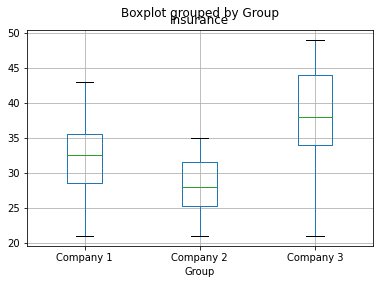

In [ ]:
X.boxplot("Insurance", "Group");
#important assumption of ANOVA is Homogenity of variance across groups
#key learning: assumptions are showing that most of times variance will not be homogenous
#ANOVA is very robust to assumptions
#homogenity is a very hard assumption to achieve
#the relax the assumtion to gain the deviation

In [ ]:
from scipy.stats import shapiro
#normality test
stat, p = shapiro(X['Insurance'])
print('Statistical=%.3f, p=%.3f'%(stat, p))
#f stands for floating number. .3f says 3 decimal points after the floating number
#interpret
#Ho = data is normal
#Ha = data is not normal
#if p-value <0.05 reject the null hypothesis
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (Normal) (Fail to reject Ho)')
else:
  print('Sample does not look Gaussian (Normal) (reject Ho)')

Statistical=0.971, p=0.632
Sample looks Gaussian (Normal) (Fail to reject Ho)


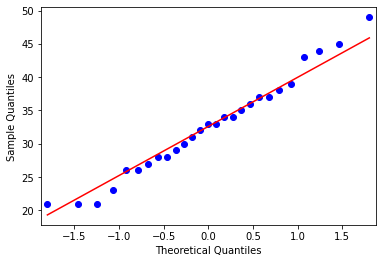

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
#q-q plot
#Quantile - Quantile box
qqplot(X['Insurance'], line = 's')
pyplot.show()